In [19]:
%matplotlib inline
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import pylab as plt

In [26]:
dev_survey1 = '../data/horizontal1.csv'

well1_df = pd.read_csv(dev_survey1).dropna(axis=0)

well2_df = pd.read_csv('../data/horizontal2.csv').dropna(axis=0)

In [8]:
def tan_method(md, inc, azi):

    azi_r = np.deg2rad(azi)
    inc_r = np.deg2rad(inc)

    northing = np.cumsum((md[1:] - md[:-1]) * np.sin(inc_r[1:]) * np.cos(azi_r[1:]))
    northing = np.insert(northing, 0, 0)

    easting = np.cumsum((md[1:] - md[:-1]) * np.sin(inc_r[1:]) * np.sin(azi_r[1:]))
    easting = np.insert(easting, 0, 0)

    tvd = np.cumsum((md[1:] - md[:-1]) * np.cos(inc_r[1:]))
    tvd = np.insert(tvd, 0, 0)

    return tvd, northing, easting

In [15]:
# input, dataframe with MD, INC and AZ
# output, dataframe with TVD, N, E added
def dev2loc(dev, md_label='MD', inc_label='INC', az_label='AZ',
            north_label='NORTHING', east_label='EASTING', tvd_label='TVD'):
    
    md = dev[md_label].values
    inc = dev[inc_label].values
    azi = dev[az_label].values
    
    tvd, northing, easting = tan_method(md, inc, azi)
    
    dev_loc = dev.copy()
    
    dev_loc[tvd_label] = tvd
    dev_loc[north_label] = northing
    dev_loc[east_label] = easting
    
    return dev_loc

In [38]:
well1_traj = dev2loc(well1_df)

In [31]:
def plot_traj_3D(traj_df, label="test well"):
    fig = plt.figure()
    ax = fig.gca(projection="3d")

    easting = traj_df['EASTING']
    northing = traj_df['NORTHING']
    tvd = traj_df['TVD']
    
    ax.plot(easting, northing, tvd, label=label)
    # ax.plot(easting, northing, true_tvd, label="true well")

    ax.invert_zaxis()
    ax.legend()


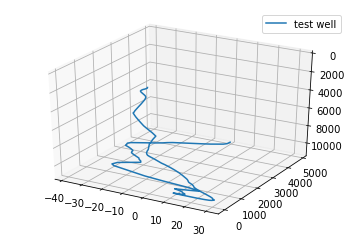

In [32]:
plot_traj_3D(traj_df)

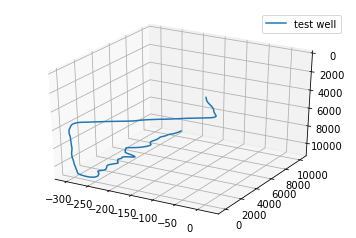

In [33]:
well2_traj = dev2loc(well2_df)
plot_traj_3D(well2_traj)

In [36]:
def plot_trajectories_3D(trajectories):
    
    fig = plt.figure()
    ax = fig.gca(projection="3d")
    
    for traj_df in trajectories:
        easting = traj_df['EASTING']
        northing = traj_df['NORTHING']
        tvd = traj_df['TVD']

        ax.plot(easting, northing, tvd, label="test well")
        # ax.plot(easting, northing, true_tvd, label="true well")

    ax.invert_zaxis()
    ax.legend()

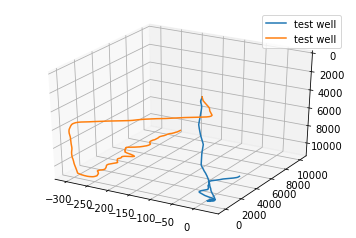

In [39]:
plot_trajectories_3D([well1_traj, well2_traj])

In [41]:
well3_df = pd.read_csv('../data/horizontal3.csv').dropna(axis=0)

well6_df = pd.read_csv('../data/horizontal6.csv').dropna(axis=0)
well7_df = pd.read_csv('../data/horizontal7.csv').dropna(axis=0)
well8_df = pd.read_csv('../data/horizontal8.csv').dropna(axis=0)

In [53]:
well3_traj = dev2loc(well3_df)

well6_traj = dev2loc(well6_df)
well7_traj = dev2loc(well7_df)
well8_traj = dev2loc(well8_df)



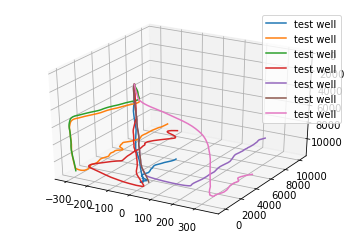

In [55]:
plot_trajectories_3D([well1_traj, well2_traj,
                      well3_traj, well6_traj,
                      well7_traj, well8_traj])